In [ ]:
#
# t - 검정 : 단일 표본, 독립 표본, 대응 표본 검정
#

### 1 표본 t 검정 :  학생들의 점수 표본 X 를 가지고 학생 점수의 평균이 10 인지 여부를 유의수준 5% 에서 검정


|학생ID | 성적 | 
|------|-----|
|1|9.76|
|2|11.10|
|3|10.70|
|4|10.72|
|5|11.80|
|6|6.15|
|7|10.52|
|8|14.83|
|9|13.03|
|10|16.46|
|11|10.84|
|12|12.45|



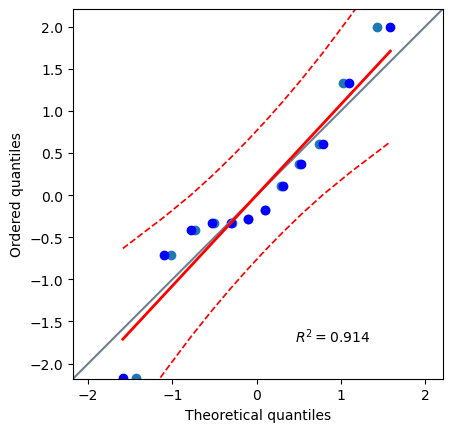

11.530000000000001


(9.887981389141206, 13.172018610858796)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

x = [9.76, 11.1, 10.7, 10.72, 11.8, 6.15, 10.52, 14.83, 13.03, 16.46, 10.84, 12.45]

# 1) 정규성 가정 체크
z =  (x - np.mean(x))  / np.std(x)
z = np.sort(z)

percentile = sp.rankdata(z) / (len(z) + 1)
theoretical_z = sp.norm.ppf(percentile)

plt.scatter(theoretical_z,z)
plt.plot([-2.0,-2.0],[2.0, 2.0],"g--")

# lib 이용해서 그려보기 → 겹쳐서 나타난것을 보면 거의 유사함을 볼 수 있음
import pingouin as pg
pg.qqplot(x, dist = "norm")
plt.show()

# 이론적 분산과 비교시 0.938 로 1에 가까움 
#  - ShapiroResult(statistic=0.9387352466583252, pvalue=0.48186349868774414)
sp.shapiro(x)  

# 2) t - test 수행
# - H0 : μ = 10 , Ha : μ ≠ 10
# - Significance Interval(유의수준) = 5%

# 양측검정시 p-value 구하기 - 1
x_bar = np.mean(x)

print(x_bar)
t_statistics = (x_bar - 10) / (np.std(x, ddof=1) / np.sqrt(len(x)))    # 2.0508338167773066
p_value = (1 - sp.t.cdf(t_statistics, df = len(x) - 1)) * 2            # 0.064882407274657

# 양측검정시 p-value 구하기 - 2
t_statistics1 = (x_bar - 10) / (np.std(x, ddof=1) / np.sqrt(len(x)))    # +2.0508338167773066
t_statistics2 = t_statistics1 * -1                                      # -2.0508338167773066
p_value = (1 - sp.t.cdf(t_statistics1, df = len(x) - 1))  + sp.t.cdf(t_statistics2, df = len(x) - 1) # 0.064882407274657

# tttest_1samp 함수로 t 검정하기
sp.ttest_1samp(x, 10, alternative='two-sided')                         # Ttest_1sampResult(statistic=2.0508338167773075, pvalue=0.06488240727465687)

# Significance Interval 5% 時 Confidential Interval
t_a = sp.t.ppf(q=0.025, df = len(x) - 1)
t_b = sp.t.ppf(q=0.975, df = len(x) - 1)
a = x_bar + t_a * (np.std(x, ddof=1) / np.sqrt(len(x)))
b = x_bar + t_b * (np.std(x, ddof=1) / np.sqrt(len(x)))
a,b                                                                    # (9.887981389141206, 13.172018610858796)

### 독립 표본 t 검정 :  남학생과 여학생의 성적 평균의 비교 (크다, 작다, 같다) 에 대한 검정


|학생ID | 성적 | 성별|
|------|-----|----|
|1|9.76|female|
|2|11.10|female|
|3|10.70|female|
|4|10.72|female|
|5|11.80|female|
|6|6.15|female|
|7|10.52|female|
|8|14.83|male|
|9|13.03|male|
|10|16.46|male|
|11|10.84|male|
|12|12.45|male|

qq plot by manual for female


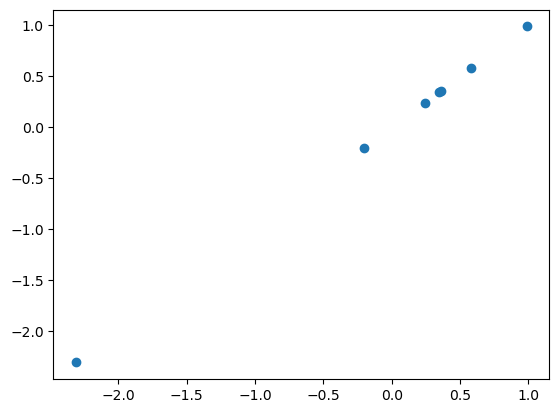

qq plot by lib for female


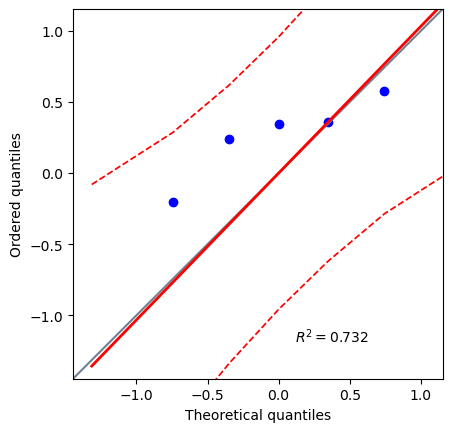

shapiro-wilk :  ShapiroResult(statistic=0.7618963718414307, pvalue=0.016863787546753883)
qq plot by manual for male


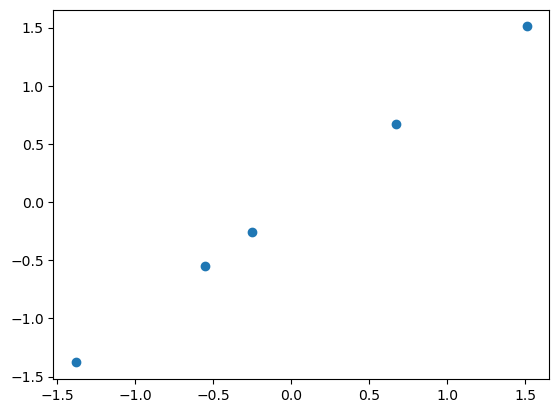

qqp lot by lib for male


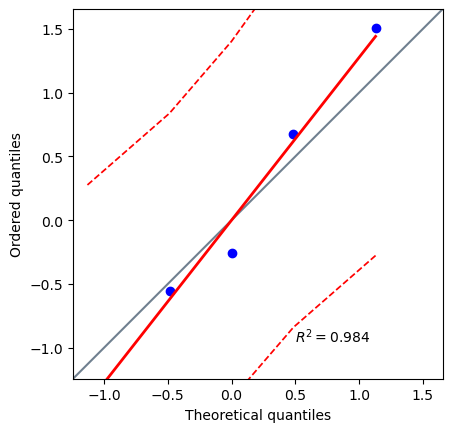

shapiro-wilk :  ShapiroResult(statistic=0.9813238382339478, pvalue=0.9415760636329651)


Ttest_indResult(statistic=-2.9360367510416157, pvalue=0.014886147657915596)

In [57]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pingouin as pg

df = pd.read_csv("./data/student_score2.csv")

#
# [1] female, male score 데이터에 대한 정규성 검토
#

df_female = df[df["gender"] == "female"].sort_values("score")
df_male = df[df["gender"] == "male"].sort_values("score")

print("qq plot by manual for female")
percentile_f = df_female["score"].rank() / (df_female["score"].shape[0] + 1)
theory_f = sp.norm.ppf(q=percentile_f)
z_f = (df_female["score"] - df_female["score"].mean()) / df_female["score"].std(ddof=0)
plt.scatter(theoretical_f, z_f)
plt.show()

print("qq plot by lib for female")
percentile_m = df_male["score"].rank() / (df_male["score"].shape[0] + 1)
theory_m = sp.norm.ppf(q=percentile_m)
z_m = (df_male["score"] - df_male["score"].mean()) / df_male["score"].std(ddof=0)
pg.qqplot(df_female["score"])
plt.show()
print("shapiro-wilk : " , sp.shapiro(df_female["score"]))    # ShapiroResult(statistic=0.7618963718414307, pvalue=0.016863787546753883)

print("qq plot by manual for male")
plt.scatter(theoretical_m, z_m)
plt.show()
print("qqp lot by lib for male")
pg.qqplot(df_male["score"])
plt.show()
print("shapiro-wilk : " ,sp.shapiro(df_male["score"]))      # ShapiroResult(statistic=0.9813238382339478, pvalue=0.9415760636329651)

#
# [2] female, male 데이터 間 등분산성 검토
# - 두 데이터가 모두 정규성을 만족하므로 정규분포에 우수한 검정력이 있는 F-test 로 등분산성 수행
#   → s1^2 / s2^2 가 chi2 분포상에 어디에 위치하는지 검토. 어떻게 하는지 모르겠음 ★
#
sp.levene(df_female["score"],df_male["score"],center="mean")          # 유의확률(p-value)가 94% 로 등분산성을 갖는다고 볼 수 있음

# ★ Q. f 검정을 f 분포상에서 직접 수행하려면 어떻게 해야 하나?
# v1 = df_female["score"].std(ddof=1) ** 2    
# v2 = df_male["score"].std(ddof=1) ** 2
# f = v1/v2
# sp.f.cdf(f, df_female.shape[0] - 1, df_male.shape[0] - 1)


#
# [3] 독립표본 t-검정 수행
# - 대립가설의 형태에 따라서 alternative 설정해서 실행
#   . 대립가설이 두 모평균이 같지 않다 → two-sided
#   . 1st 모평균이 2보다 크다 → greater
# - 정규성 통과 상태에서 등분산 통과되었으면 equal_var 를 True 로 설정.
#   그렇지 않으면 False
#
sp.ttest_ind(df_female["score"],df_male["score"],alternative="greater",equal_var=True)      # Ttest_indResult(statistic=-2.9360367510416157, pvalue=0.9925569261710422)
sp.ttest_ind(df_female["score"],df_male["score"],alternative="two-sided" , equal_var=True)  # Ttest_indResult(statistic=-2.9360367510416157, pvalue=0.014886147657915596)

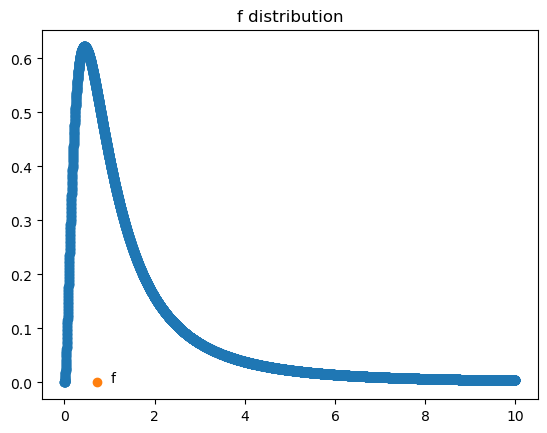

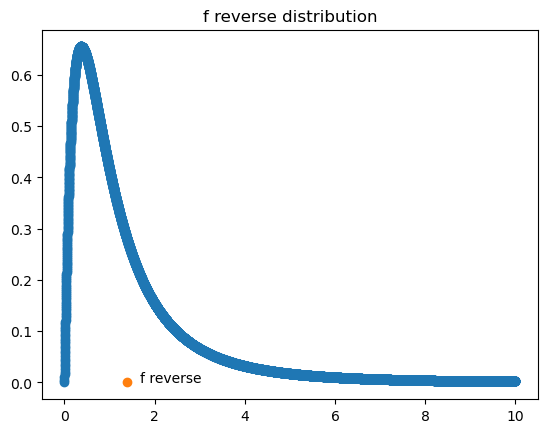

0.6870845918240329

In [124]:
#
# F 분포 상에서의 통계량과 p-value 확인
# 


df = pd.read_csv("./data/student_score2.csv")
x1 = np.array(df[df["gender"] == "female"]["score"])
x2 = np.array(df[df["gender"] == "male"]["score"])

#
# (1) s1/s2 의 f 분포 상에서
#
# 위 자료가 갖는 자유도를 기준으로 밀도 함수를 그리면
x = np.arange(0, 10, 0.001)
y = sp.f.pdf(x, len(x1)-1, len(x2)-1)
plt.title("f distribution")
plt.scatter(x, y)

# f 분포상에 f 통계량은 0.72 로 좌측에 있음
# 유의확률은 이것보다 극단적인 값이 관찰된 확률이므로 f 통계량까지의 누적확률분포값을 p-value 로 함
f = np.var(x1, ddof=1) / np.var(x2, ddof=1)          # 0.7230748344750079
plt.text(f + 0.3, 0, "f")
plt.scatter(f, 0)
a =  sp.f.cdf(f, len(x1)-1, len(x2)-1)               # 0.34354229591201646
plt.show()

#
# (2) s2/s1 의 f 분포 상에서
#
x = np.arange(0, 10, 0.001)
y = sp.f.pdf(x, len(x2)-1, len(x1)-1)
plt.title("f reverse distribution")
plt.scatter(x,y)

# f 분포상에서 f 통계량은 1.38 로 우측에 존재
# 유의확률은 이것보다 극단적인 값이 관찰된 확률이므로 f 통계량까지의 누적확률을 1 에서 뺍
f_reverse = np.var(x2, ddof=1) / np.var(x1, ddof=1)  # 1.3829827181387873
plt.text(f_reverse + 0.3, 0, "f reverse")
plt.scatter(f_reverse, 0)
b = (1- sp.f.cdf(f_reverse, len(x2)-1, len(x1)-1))  # 0.34354229591201646
plt.show()

#
# (3) (1), (2) 에서의 유의확률을 더함
#
p_value = a + b                                     # 0.6870845918240329
p_value


### 대응 표본 t 검정 :  교육 프로그램 전후의 성적 비교
### - 교육 프로그램의 점수 향상이 없음을 귀무가설로 하고 대립가설은 향상이 있음
### - 전/후 성적의 차이를 별도의 변수로 정의하여 이것을 단일표본 t 검정을 수행함

|학생ID | 성적 | 전후 |
|------|-----|----|
|1|9.76|before|
|2|11.10|before|
|3|10.70|before|
|4|10.72|before|
|5|11.80|before|
|6|6.15|before|
|1|10.52|after|
|2|14.83|after|
|3|13.03|after|
|4|16.46|after|
|5|10.84|after|
|6|12.45|after|

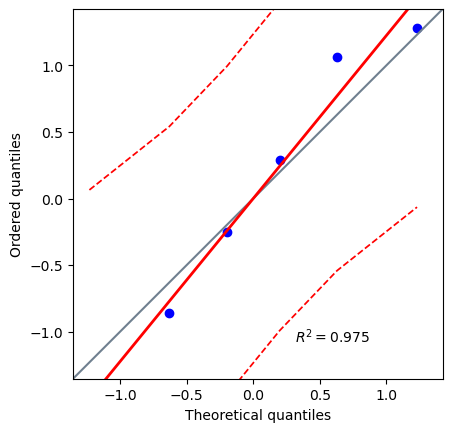

Ttest_relResult(statistic=2.5811614301011883, pvalue=0.02468128345546597)

In [73]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pingouin as pg

#
# 교육 프로그램 전후의 성적 차이 변수 추가
#
df = pd.read_csv("./data/student_score3.csv")
df = df.pivot(index="id",columns="test",values="score")
df["diff"] = df["after"] - df["before"]

#
# diff 데이터의 정규성 검토
#
pg.qqplot(df["diff"], dist="norm")
plt.show()
sp.shapiro(df["diff"])            # ShapiroResult(statistic=0.9559008479118347, pvalue=0.7876580357551575)

#
# t 검정 수행
# - ttest_1samp 로 대립가설이 두 차이값이 0 보다 크다라는 것으로 검정
sp.ttest_1samp(df["diff"], popmean=0 , alternative="greater") # Ttest_1sampResult(statistic=2.5811614301011883, pvalue=0.02468128345546597)

# 또는 after 가 before 보다 크다라는 것으로 검정
sp.ttest_rel(df["after"],df["before"],alternative="greater")  # Ttest_relResult(statistic=2.5811614301011883, pvalue=0.02468128345546597)